### Capturing the NaN value with end of distribution
#### When is it used?
Where data is not missing completely at random

i.e: There is some relationship between the missing data and other observation of the data

helps to capture outliers with the data value at the end of distrubution

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('dataset/titanic_train.csv', usecols=['Age', 'Survived', 'Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

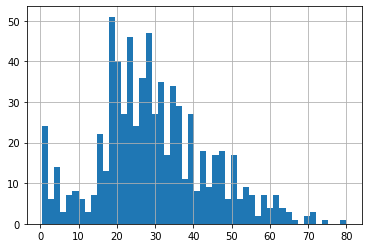

In [4]:
df.Age.hist(bins=50)

In [5]:
df.Age.mean()

29.69911764705882

In [6]:
# here we pickup the value after the 3rd standard deviation
# the mean of the df[Age] is 29
# the value after the 3rd deviation is 73.27(right end of the data distribution)

extreme = df.Age.mean()+3*df.Age.std()
extreme

73.27860964406094

In [7]:
# df.Age.isnull().sum()
# men_fill_age = df.Age.fillna(df['Age'].mode())

In [8]:
import seaborn as sns

c:\users\hitesh\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

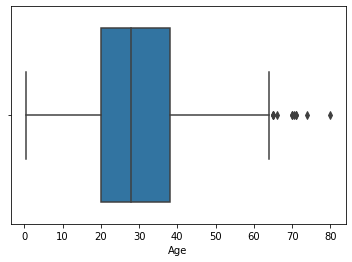

In [9]:
# on plotting the box plot we see that the there are outliers

sns.boxplot('Age', data=df)

In [10]:
def impute_nan(df, variable, median, extreme):
    
    #create a new feature column and fill the NaN value with the extreme value
    df[variable+'_end_distribution']=df[variable].fillna(extreme)
    df[variable].fillna(median, inplace = True) # filling the NaN value in Age column with median value 
#     df[variable+'_mean_val'] = df[variable].fillna(men_fill_age)

In [11]:
impute_nan(df, 'Age', df.Age.median(), extreme)

In [12]:
df.head(20)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<AxesSubplot:>

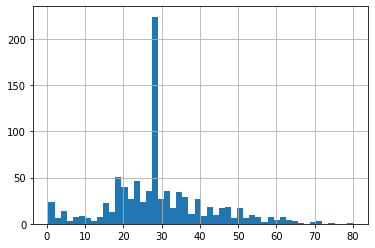

In [12]:
df.Age.hist(bins=50)

<AxesSubplot:>

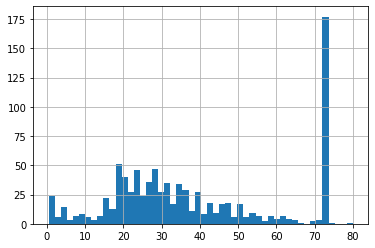

In [13]:
df.Age_end_distribution.hist(bins=50)

c:\users\hiteshp.rptech\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age_end_distribution'>

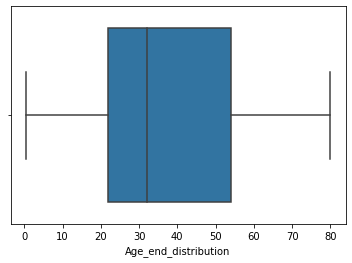

In [14]:
# in the feature column [Age_end_distribution] we have used the value 73.23
# to fill the NaN values, hence we see the outlier vanishes.

sns.boxplot('Age_end_distribution', data=df)

In [15]:
age_med = df.Age.median()
age_med

28.0

In [16]:
age_men = df.Age.mean()
age_men

29.36158249158249

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

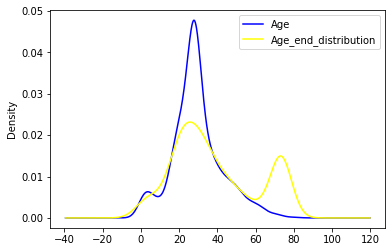

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['Age'].plot(kind='kde', ax=ax, color='blue')
df.Age_end_distribution.plot(kind='kde', ax=ax, color='yellow')
# df.Age_mean_val.plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')